In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sb_file = '../../DO_allsites_allyears_20250611.csv'
df_sb = pd.read_csv(sb_file)
df_sb['datetime'] = pd.to_datetime(df_sb['datetime_UTC'], utc=True)

df_sb['datetime'] = df_sb['datetime'].dt.tz_convert('America/Los_Angeles')
# df_sb['datetime'] = df_sb['datetime'].dt.tz_convert('US/Eastern')
start_sb = '2017-07-11'
end_sb = '2017-07-18'
mask = (df_sb['site'] == 'SBH') & (df_sb['datetime'] >= start_sb) & (df_sb['datetime'] <= end_sb)
july_2017_sb = df_sb.loc[mask]

In [3]:
fl_file = '../../3OEC_current_flow.csv'
df_fl = pd.read_csv(fl_file)
df_fl["O2_avg"] = df_fl[["O2_S1", "O2_S2", "O2_S3"]].mean(axis=1)

from datetime import datetime, timedelta

start_time_11 = datetime(2017, 7, 11, 14, 0, 0)
end_time_11 = datetime(2017, 7, 12, 8, 0, 0)

start_time_13 = datetime(2017, 7, 13, 11, 0, 0)
end_time_13 = datetime(2017, 7, 14, 6, 0, 0)

start_time_15 = datetime(2017, 7, 15, 10, 0, 0)
end_time_15 = datetime(2017, 7, 16, 6, 0, 0)

start_time_16 = datetime(2017, 7, 16, 16, 0, 0)
end_time_16 = datetime(2017, 7, 17, 6, 0, 0)

deployments = {
    "3oec_2017_7_11_12": {"start": start_time_11, "end": end_time_11},
    "3oec_2017_7_13_14": {"start": start_time_13, "end": end_time_13},
    "3oec_2017_7_15_16": {"start": start_time_15, "end": end_time_15},
    "3oec_2017_7_16_17": {"start": start_time_16, "end": end_time_16}
}

date_ranges = []

for deployment_name, deployment_info in deployments.items():
    start_time = deployment_info["start"]
    end_time = deployment_info["end"]
    if deployment_name == "3oec_2017_7_13_14":
        start_time -= timedelta(seconds=0.125)
    print(start_time)

    # Calculate total seconds and number of measurements
    total_seconds = (end_time - start_time).total_seconds() + 0.125
    num_measurements = int(total_seconds * 8)

    # Create DatetimeIndex for the deployment
    date_range = pd.date_range(start=start_time, periods=num_measurements, freq=f'{1000/8}ms')
    print(date_range[0], date_range[-1])
    print(len(date_range))
    date_ranges.append(pd.Series(date_range))

# Concatenate all DatetimeIndexes
complete_index = pd.concat(date_ranges)

# Set the complete index to your DataFrame
df_fl.index = complete_index
# df_fl["O2_avg"].ffill().bfill()
df_fl["O2_avg"] = df_fl["O2_avg"] * 0.032   # convert to mg/L

2017-07-11 14:00:00
2017-07-11 14:00:00 2017-07-12 08:00:00
518401
2017-07-13 10:59:59.875000
2017-07-13 10:59:59.875000 2017-07-14 06:00:00
547202
2017-07-15 10:00:00
2017-07-15 10:00:00 2017-07-16 06:00:00
576001
2017-07-16 16:00:00
2017-07-16 16:00:00 2017-07-17 06:00:00
403201


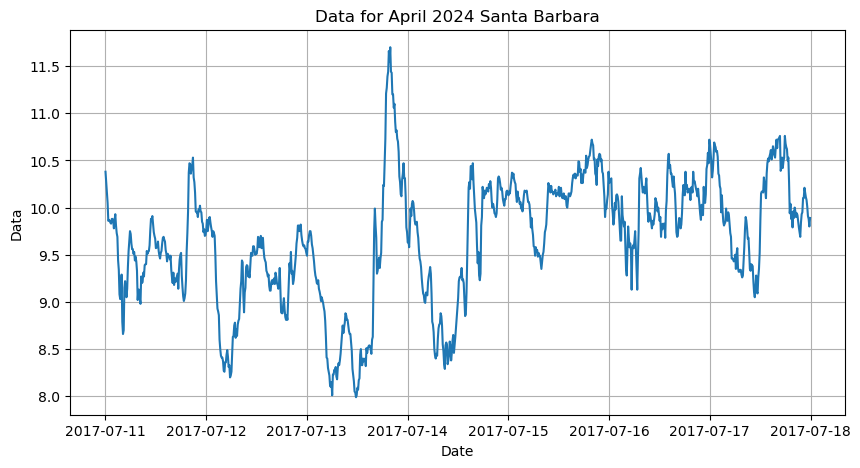

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(july_2017_sb['datetime'], july_2017_sb['DO_mgl'])
plt.title('Data for April 2024 Santa Barbara')
plt.xlabel('Date')
plt.ylabel('Data')
plt.grid(True)
plt.show()

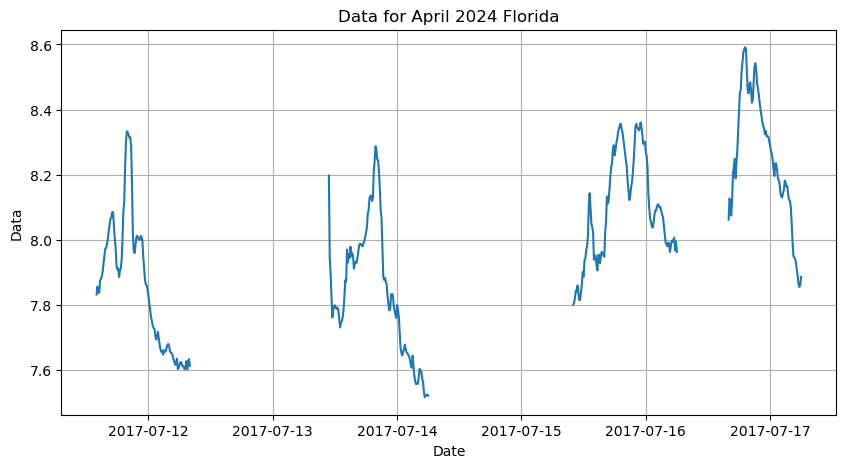

In [5]:
df_fl_resampled = df_fl['O2_avg'].resample('10min').mean()
plt.figure(figsize=(10, 5))
plt.plot(df_fl_resampled.index, df_fl_resampled)
plt.title('Data for April 2024 Florida')
plt.xlabel('Date')
plt.ylabel('Data')
plt.grid(True)
plt.show()

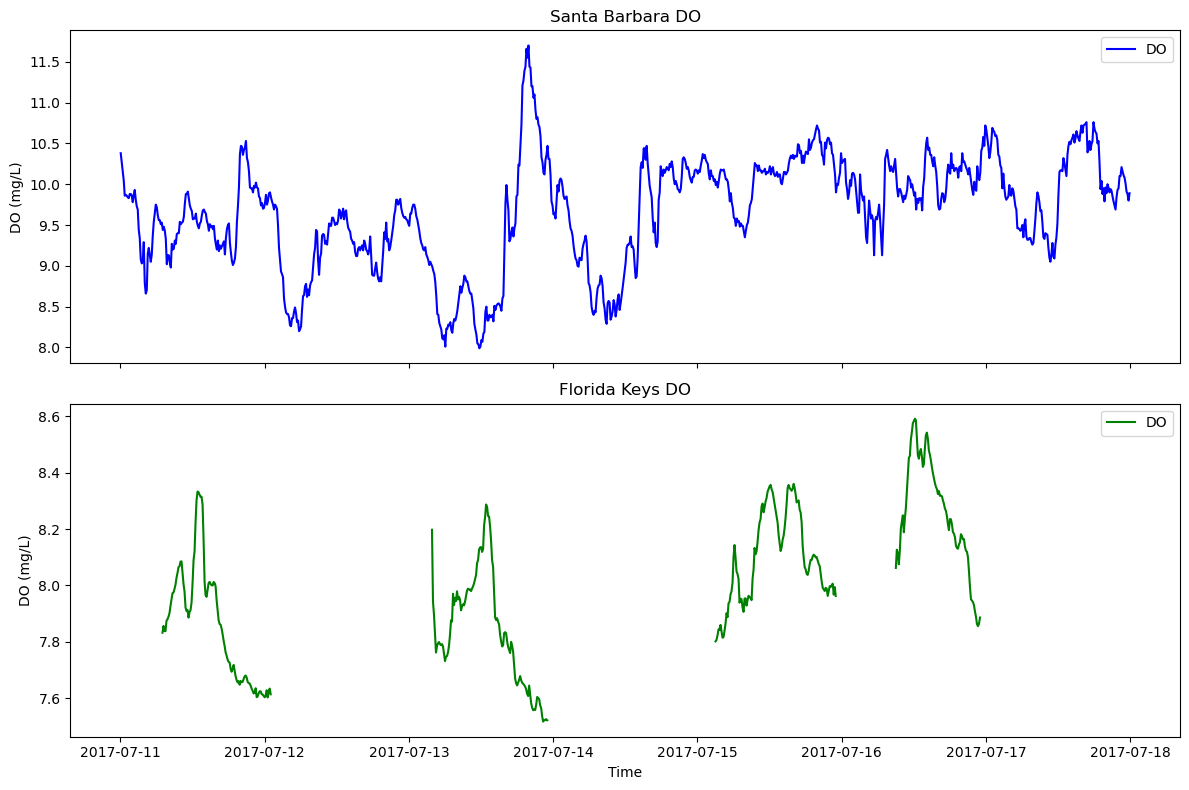

In [6]:
# Create two vertically stacked plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)


ax1.plot(july_2017_sb["datetime"], july_2017_sb['DO_mgl'], color="blue", label="DO")
ax1.set_title("Santa Barbara DO")
ax1.set_ylabel("DO (mg/L)")
ax1.legend()

ax2.plot(df_fl_resampled.index, df_fl_resampled, color="green", label="DO")
ax2.set_title("Florida Keys DO")
ax2.set_xlabel("Time")
ax2.set_ylabel("DO (mg/L)")
ax2.legend()

plt.tight_layout()
plt.show()

/tmp/ipykernel_8899/1606050934.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july_2017_sb["datetime"] = july_2017_sb['datetime'].dt.tz_localize(None)


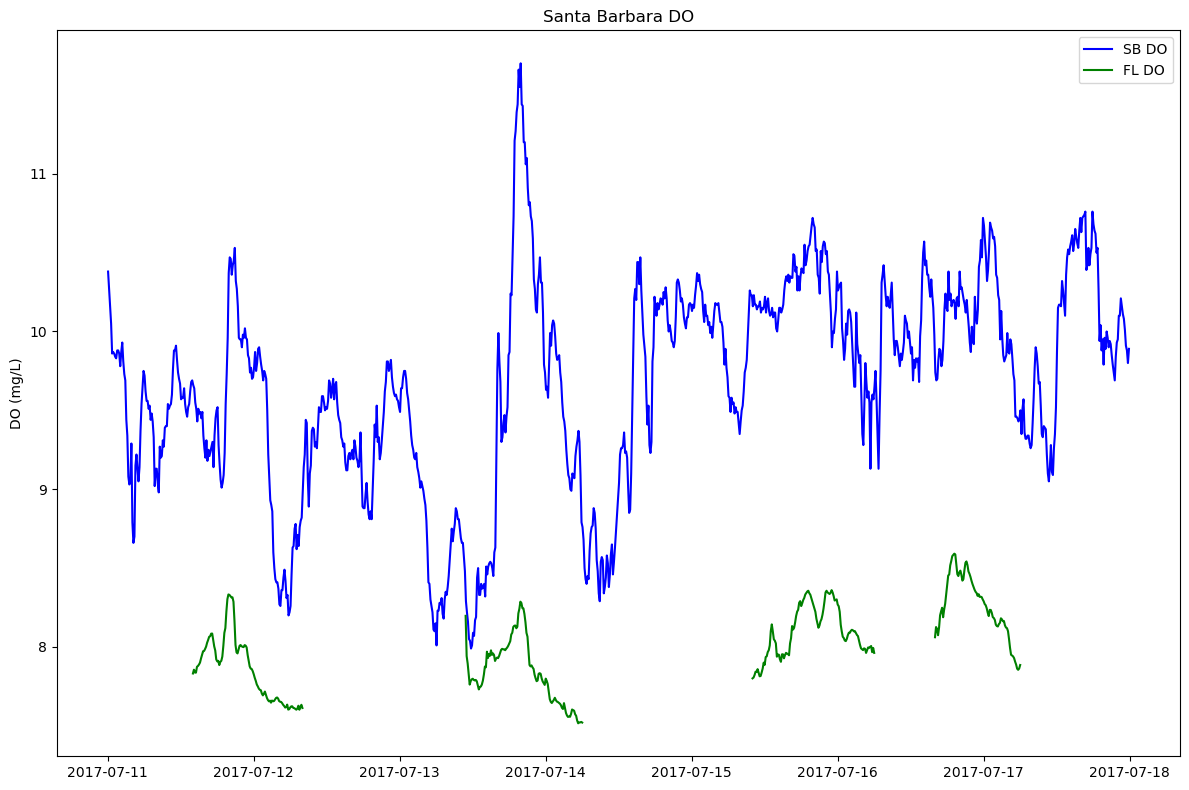

In [7]:
# Create two vertically stacked plots
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

plt.figure(figsize=(12, 8))
# plt.plot(df_fl_resampled.index, df_fl_resampled)
# plt.title('Data for April 2024 Florida')
# plt.xlabel('Date')
# plt.ylabel('Data')
# plt.grid(True)
# plt.show()
july_2017_sb["datetime"] = july_2017_sb['datetime'].dt.tz_localize(None)

plt.plot(july_2017_sb["datetime"], july_2017_sb['DO_mgl'], color="blue", label="SB DO")
plt.plot(df_fl_resampled.index, df_fl_resampled, color="green", label="FL DO")
plt.title("Santa Barbara DO")
plt.ylabel("DO (mg/L)")
plt.legend()

# ax2.plot(df_fl_resampled.index, df_fl_resampled, color="green", label="DO")
# ax2.set_title("Florida Keys DO")
# ax2.set_xlabel("Time")
# ax2.set_ylabel("DO (mg/L)")
# ax2.legend()

plt.tight_layout()
plt.show()

Date range: 2017-07-11 14:00:00 -- 2017-07-12 08:00:00

/tmp/ipykernel_8899/1324262276.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp1['datetime'] = tmp1['datetime'].dt.tz_localize(None)


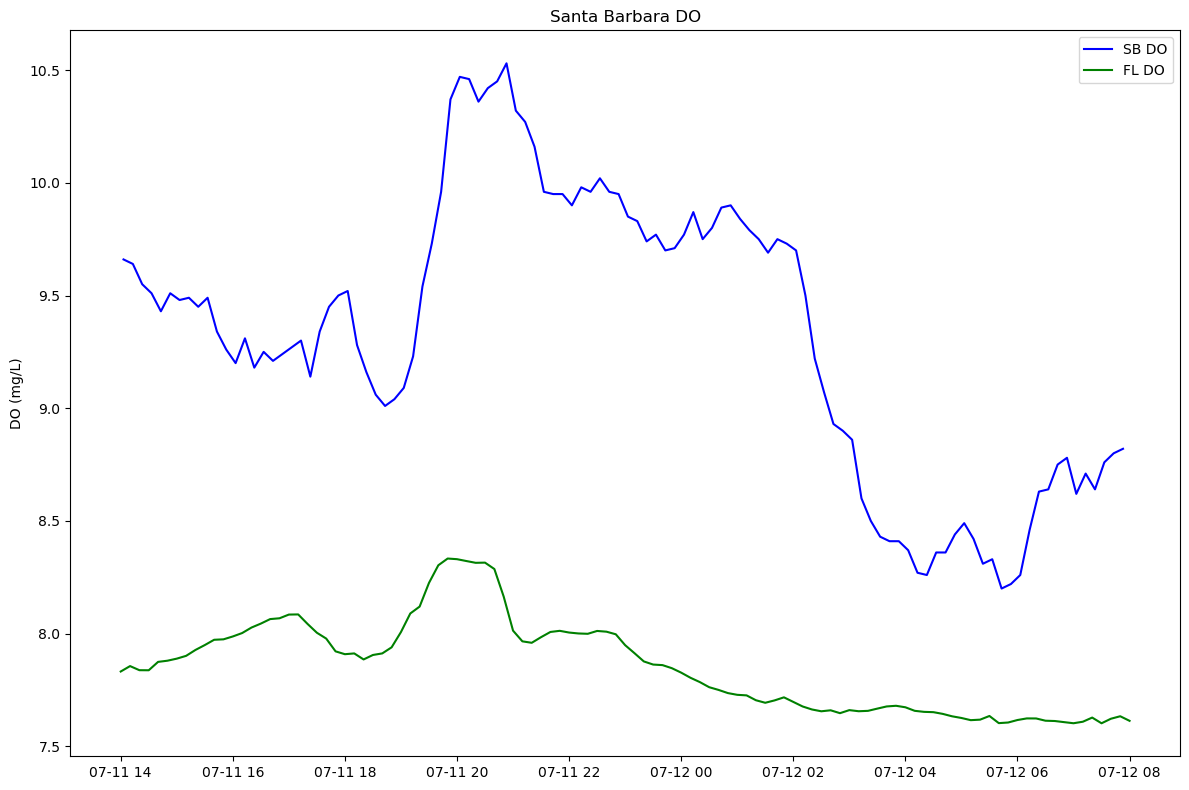

In [8]:
# 2017-07-11 14:00:00 2017-07-12 08:00:00
start_time = '2017-07-11 14:00:00'
end_time = '2017-07-12 08:00:00'
mask_sb_1 = (july_2017_sb['datetime'] >= start_time) & (july_2017_sb['datetime'] <= end_time)
mask_fl_1 = (df_fl_resampled.index >= start_time) & (df_fl_resampled.index <= end_time)
tmp1 = july_2017_sb.loc[mask_sb_1]
tmp1['datetime'] = tmp1['datetime'].dt.tz_localize(None)
tmp2 = df_fl_resampled.loc[mask_fl_1]
plt.figure(figsize=(12, 8))


plt.plot(tmp1["datetime"], tmp1['DO_mgl'], color="blue", label="SB DO")
plt.plot(tmp2.index, tmp2, color="green", label="FL DO")
plt.title("Santa Barbara DO")
plt.ylabel("DO (mg/L)")
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
tmp1.index = tmp1['datetime'].dt.tz_localize(None)

In [14]:
tmp1.index

DatetimeIndex(['2017-07-11 14:03:00', '2017-07-11 14:13:00',
               '2017-07-11 14:23:00', '2017-07-11 14:33:00',
               '2017-07-11 14:43:00', '2017-07-11 14:53:00',
               '2017-07-11 15:03:00', '2017-07-11 15:13:00',
               '2017-07-11 15:23:00', '2017-07-11 15:33:00',
               ...
               '2017-07-12 06:23:00', '2017-07-12 06:33:00',
               '2017-07-12 06:43:00', '2017-07-12 06:53:00',
               '2017-07-12 07:03:00', '2017-07-12 07:13:00',
               '2017-07-12 07:23:00', '2017-07-12 07:33:00',
               '2017-07-12 07:43:00', '2017-07-12 07:53:00'],
              dtype='datetime64[ns]', name='datetime', length=108, freq=None)

/tmp/ipykernel_3680/2810202776.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp1['datetime'] = tmp1['datetime'].dt.tz_localize(None)


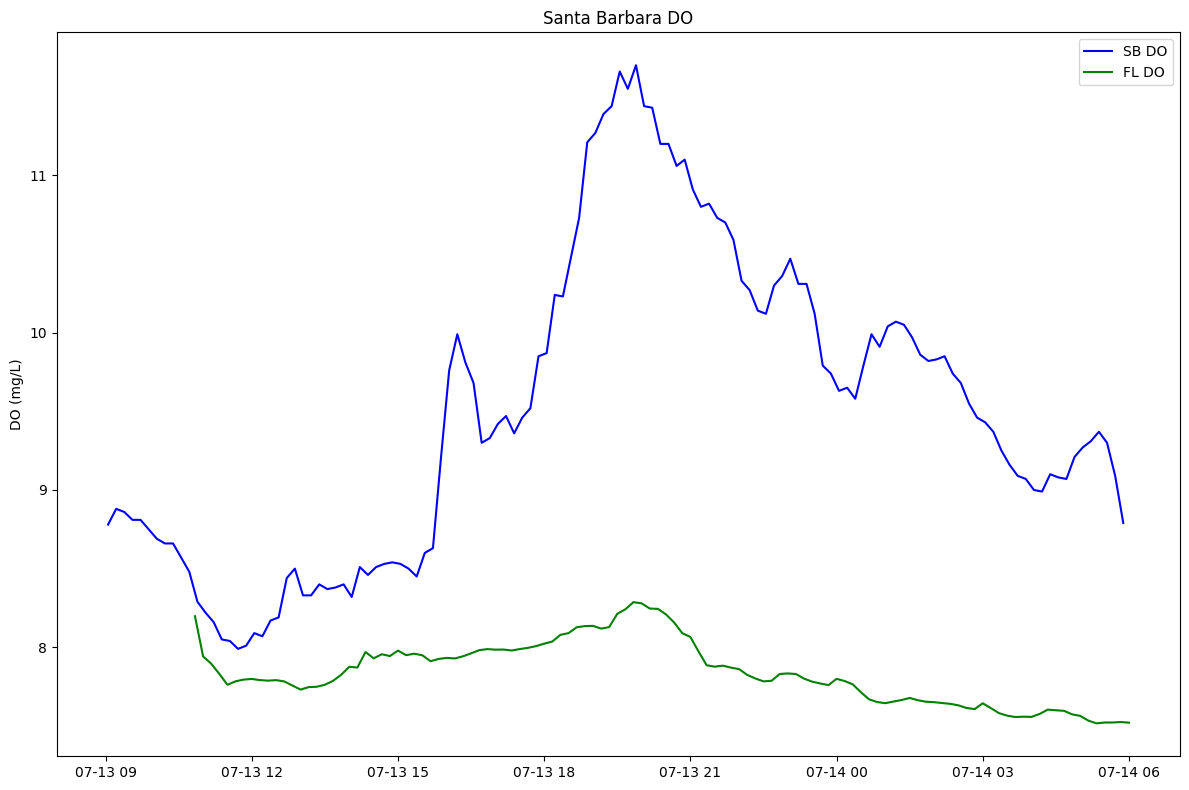

In [38]:
# 2017-07-13 10:59:59.875000 2017-07-14 06:00:00
start_time = '2017-07-13 9:00:00'
end_time = '2017-07-14 06:00:00'
mask_sb_1 = (july_2017_sb['datetime'] >= start_time) & (july_2017_sb['datetime'] <= end_time)
mask_fl_1 = (df_fl_resampled.index >= start_time) & (df_fl_resampled.index <= end_time)
tmp1 = july_2017_sb.loc[mask_sb_1]
tmp1['datetime'] = tmp1['datetime'].dt.tz_localize(None)
tmp2 = df_fl_resampled.loc[mask_fl_1]
plt.figure(figsize=(12, 8))


plt.plot(tmp1["datetime"], tmp1['DO_mgl'], color="blue", label="SB DO")
plt.plot(tmp2.index, tmp2, color="green", label="FL DO")
plt.title("Santa Barbara DO")
plt.ylabel("DO (mg/L)")
plt.legend()

plt.tight_layout()
plt.show()


/tmp/ipykernel_3680/4281129244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp1['datetime'] = tmp1['datetime'].dt.tz_localize(None)


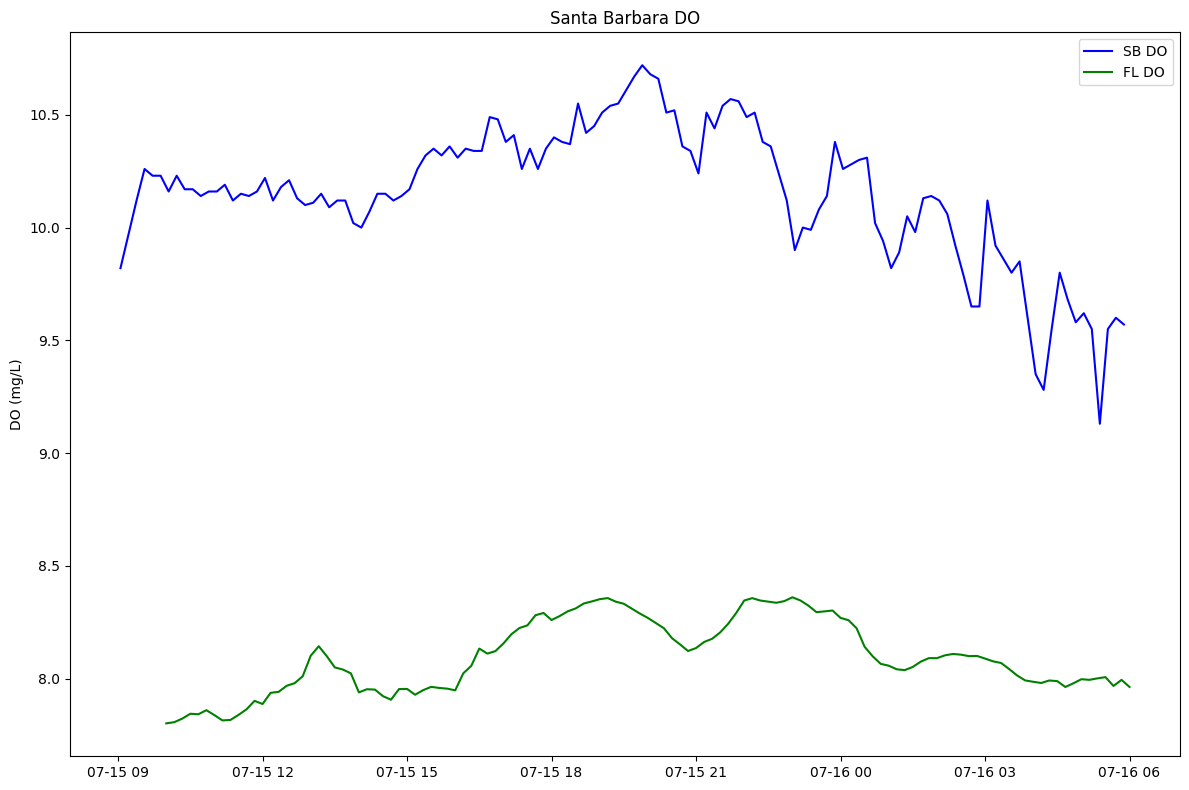

In [39]:
# 2017-07-15 10:00:00 2017-07-16 06:00:00
start_time = '2017-07-15 9:00:00'
end_time = '2017-07-16 06:00:00'
mask_sb_1 = (july_2017_sb['datetime'] >= start_time) & (july_2017_sb['datetime'] <= end_time)
mask_fl_1 = (df_fl_resampled.index >= start_time) & (df_fl_resampled.index <= end_time)
tmp1 = july_2017_sb.loc[mask_sb_1]
tmp1['datetime'] = tmp1['datetime'].dt.tz_localize(None)
tmp2 = df_fl_resampled.loc[mask_fl_1]
plt.figure(figsize=(12, 8))


plt.plot(tmp1["datetime"], tmp1['DO_mgl'], color="blue", label="SB DO")
plt.plot(tmp2.index, tmp2, color="green", label="FL DO")
plt.title("Santa Barbara DO")
plt.ylabel("DO (mg/L)")
plt.legend()

plt.tight_layout()
plt.show()


/tmp/ipykernel_3680/1100294493.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp1['datetime'] = tmp1['datetime'].dt.tz_localize(None)


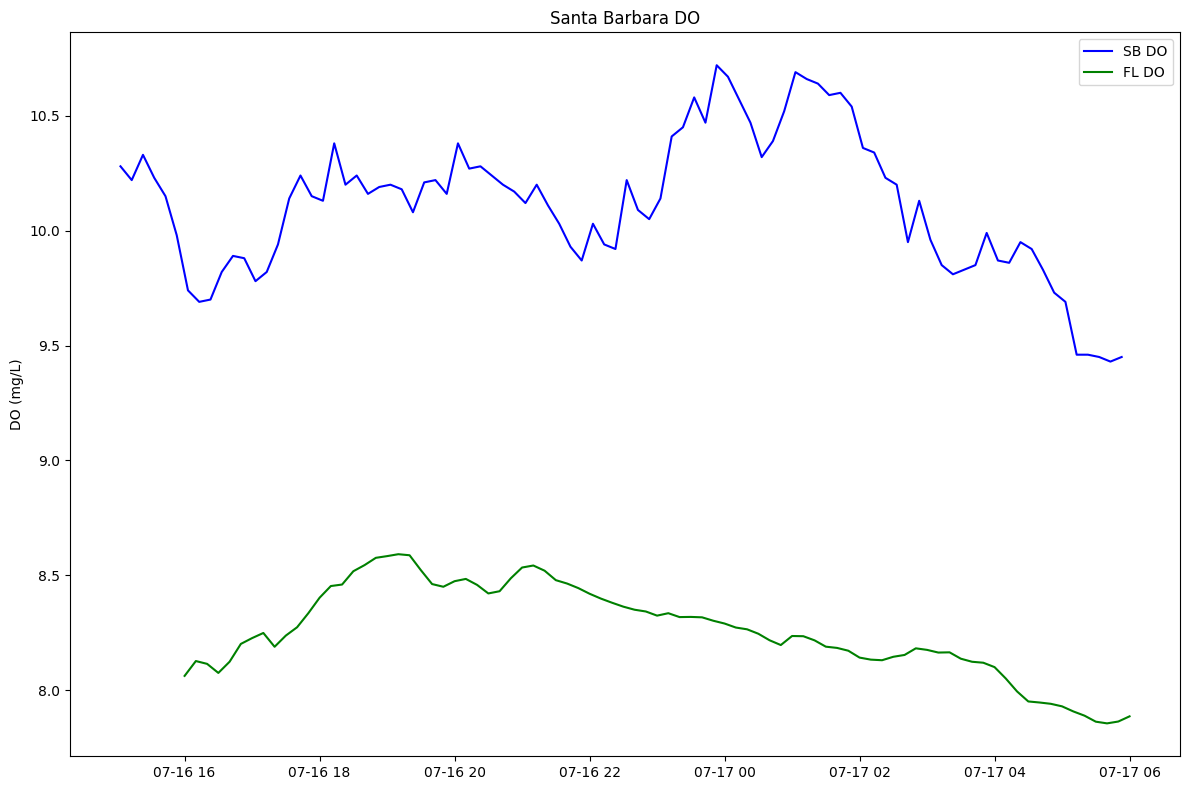

In [40]:
# 2017-07-16 16:00:00 2017-07-17 06:00:00
start_time = '2017-07-16 15:00:00'
end_time = '2017-07-17 06:00:00'
mask_sb_1 = (july_2017_sb['datetime'] >= start_time) & (july_2017_sb['datetime'] <= end_time)
mask_fl_1 = (df_fl_resampled.index >= start_time) & (df_fl_resampled.index <= end_time)
tmp1 = july_2017_sb.loc[mask_sb_1]
tmp1['datetime'] = tmp1['datetime'].dt.tz_localize(None)
tmp2 = df_fl_resampled.loc[mask_fl_1]
plt.figure(figsize=(12, 8))


plt.plot(tmp1["datetime"], tmp1['DO_mgl'], color="blue", label="SB DO")
plt.plot(tmp2.index, tmp2, color="green", label="FL DO")
plt.title("Santa Barbara DO")
plt.ylabel("DO (mg/L)")
plt.legend()

plt.tight_layout()
plt.show()
